# Setup & Import Libraries

In [ ]:
!pip install jinja2==3.0.1 -q
!pip install ipympl -q
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3 -q
!pip install pycaret[full] -q
!pip install markupsafe==2.0.1

In [2]:
import os
import numpy as np
import pandas as pd
import jinja2
from pycaret.anomaly import *
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from scipy.stats import kurtosis
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipympl
%matplotlib inline

# Load Dataset

In [5]:
df = pd.read_csv("data.csv", sep=';', header=0)

df.head()

idnr  b1            b2   b3    b4  c1  c2            c3   c4   c5  c6   c7  \
0     1   0  b982aebe4b85  306  2698   0   0  7e8b1406d903  0.0  0.0   0  1.0   
1     2   0  615d2eb5810a  105   145   0   0  7e8b1406d903  0.0  0.0   0  1.0   
2     3   0  b982aebe4b85  197  9287   0   0  7e8b1406d903  0.0  0.0   0  1.0   
3     4   0  b982aebe4b85  247  1581   0   0  7e8b1406d903  0.0  0.0   0  1.0   
4     5   0  b982aebe4b85  233  1120   0   0  7e8b1406d903  0.0  0.0   0  1.0   

    c8            c9  c10  c11  c12  c13  c14           c15  c16  c17  \
0  0.0  7e8b1406d903  0.0  0.0  0.0  254    0  2f169f9b4e6a    1    4   
1  0.0  7e8b1406d903  0.0  0.0  0.0   99    0  7e8b1406d903    0    1   
2  0.0  7e8b1406d903  0.0  0.0  0.0  255    0  2f169f9b4e6a    0    2   
3  0.0  7e8b1406d903  0.0  0.0  0.0  255    0  2f169f9b4e6a    0    5   
4  0.0  7e8b1406d903  0.0  0.0  0.0  255    0  2f169f9b4e6a    0    3   

            c18           c19           c20   c21  c22   c23  c24  c25  \
0  651938cac602  7e8b1406d903  7e8b1406d903  0.01    0  0.00    4    0   
1  651938cac602  7e8b1406d903  7e8b1406d903  0.02    0  0.00    1    0   
2  651938cac602  7e8b1406d903  7e8b1406d903  0.00    0  0.22    9    0   
3  651938cac602  7e8b1406d903  7e8b1406d903  0.00    0  0.00    5    0   
4  651938cac602  7e8b1406d903  7e8b1406d903  0.00    0  0.00    3    0   

            c26  c27   c28           c29   c30  c31   c32  c33  c34  c35  c36  \
0  af4b5bc5ca2f    0  1.00  7e8b1406d903  0.00    0  0.00  0.0  0.0  0.0    0   
1  af2f2ec57ada    0  0.86  7e8b1406d903  0.00    0  0.01  0.0  0.0  0.0    0   
2  af4b5bc5ca2f    0  1.00  7e8b1406d903  0.00    0  0.00  0.0  0.0  0.0    0   
3  af4b5bc5ca2f    0  1.00  7e8b1406d903  0.03    0  0.20  0.0  0.0  0.0    0   
4  af4b5bc5ca2f    0  1.00  7e8b1406d903  0.04    0  0.01  0.0  0.0  0.0    0   

   c37  
0  255  
1  115  
2  255  
3    5  
4   68

# Exploratory Data Analysis - EDA

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78764 entries, 0 to 78763
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idnr    78764 non-null  int64  
 1   b1      78764 non-null  int64  
 2   b2      78764 non-null  object 
 3   b3      78764 non-null  int64  
 4   b4      78764 non-null  int64  
 5   c1      78764 non-null  int64  
 6   c2      78764 non-null  int64  
 7   c3      78764 non-null  object 
 8   c4      78764 non-null  float64
 9   c5      78764 non-null  float64
 10  c6      78764 non-null  int64  
 11  c7      78764 non-null  float64
 12  c8      78764 non-null  float64
 13  c9      78764 non-null  object 
 14  c10     78764 non-null  float64
 15  c11     78764 non-null  float64
 16  c12     78764 non-null  float64
 17  c13     78764 non-null  int64  
 18  c14     78764 non-null  int64  
 19  c15     78764 non-null  object 
 20  c16     78764 non-null  int64  
 21  c17     78764 non-null  int64  
 22

In [22]:
df.describe()

idnr            b1            b3            b4            c1  \
count  78764.000000  78764.000000  7.876400e+04  7.876400e+04  78764.000000   
mean   39382.500000    221.334506  4.212667e+03  4.081650e+03      0.005853   
std    22737.352638   1379.419351  1.306736e+05  7.252236e+04      0.233825   
min        1.000000      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    19691.750000      0.000000  1.470000e+02  1.310000e+02      0.000000   
50%    39382.500000      0.000000  2.320000e+02  4.150000e+02      0.000000   
75%    59073.250000      0.000000  3.150000e+02  2.126000e+03      0.000000   
max    78764.000000  58329.000000  5.135678e+06  5.155468e+06     28.000000   

                 c2            c4            c5       c6            c7  ...  \
count  78764.000000  78764.000000  78764.000000  78764.0  78764.000000  ...   
mean       0.057641      0.057039      0.055584      0.0      0.985690  ...   
std        4.893374      0.223525      0.226614      0.0      0.091636  ...   
min        0.000000      0.000000      0.000000      0.0      0.000000  ...   
25%        0.000000      0.000000      0.000000      0.0      1.000000  ...   
50%        0.000000      0.000000      0.000000      0.0      1.000000  ...   
75%        0.000000      0.000000      0.000000      0.0      1.000000  ...   
max      993.000000      1.000000      1.000000      0.0      1.000000  ...   

                c27           c28           c30           c31           c32  \
count  78764.000000  78764.000000  78764.000000  78764.000000  78764.000000   
mean       0.126555      0.844032      0.024944      0.000089      0.139964   
std        1.700752      0.306045      0.051542      0.013800      0.289011   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.910000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.010000      0.000000      0.010000   
75%        0.000000      1.000000      0.030000      0.000000      0.080000   
max       30.000000      1.000000      1.000000      3.000000      1.000000   

                c33           c34           c35           c36           c37  
count  78764.000000  78764.000000  78764.000000  78764.000000  78764.000000  
mean       0.001912      0.055261      0.018022      0.030941    147.690798  
std        0.028438      0.227704      0.115842      4.374954    103.717580  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000     37.000000  
50%        0.000000      0.000000      0.000000      0.000000    158.000000  
75%        0.000000      0.000000      0.000000      0.000000    255.000000  
max        1.000000      1.000000      1.000000    884.000000    255.000000  

[8 rows x 33 columns]

**Visualize behavioural features**

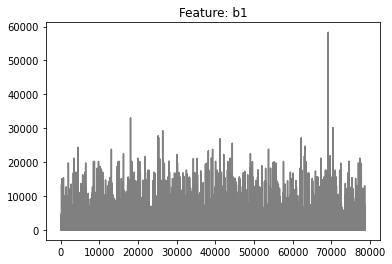

In [34]:
plt.plot(df["b1"], color="grey")
plt.title("Feature: b1")
plt.show()

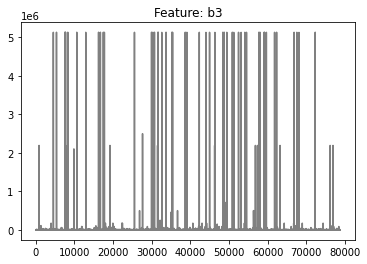

In [37]:
plt.plot(df["b3"], color="grey")
plt.title("Feature: b3")
plt.show()

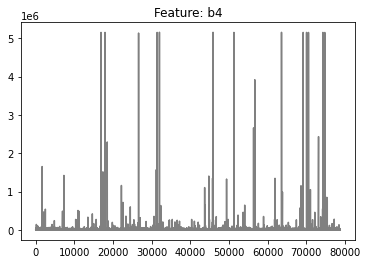

In [38]:
plt.plot(df["b4"], color="grey")
plt.title("Feature: b4")
plt.show()

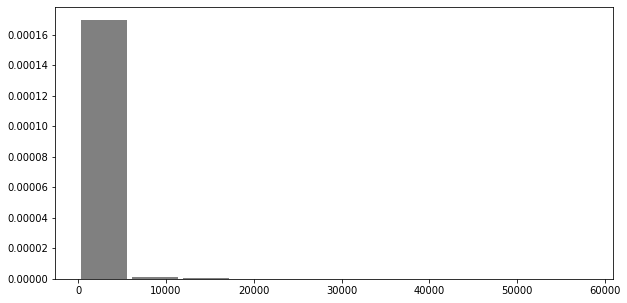

In [49]:
plt.figure(figsize=(10,5))
plt.hist(df.b1, color="grey", density=True, rwidth=0.9)
plt.show()

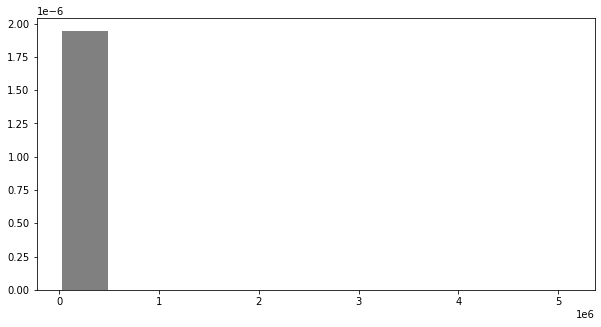

In [50]:
plt.figure(figsize=(10,5))
plt.hist(df.b3, color="grey", density=True, rwidth=0.9)
plt.show()

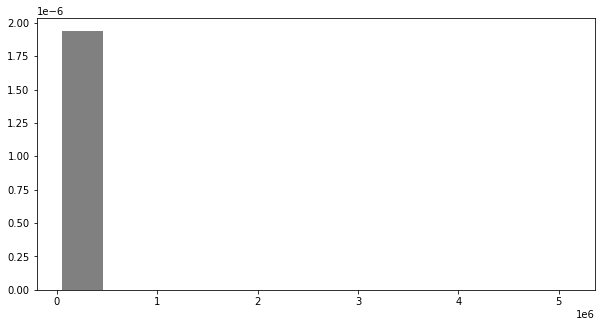

In [52]:
plt.figure(figsize=(10,5))
plt.hist(df.b4, color="grey", density=True, rwidth=0.8)
plt.show()

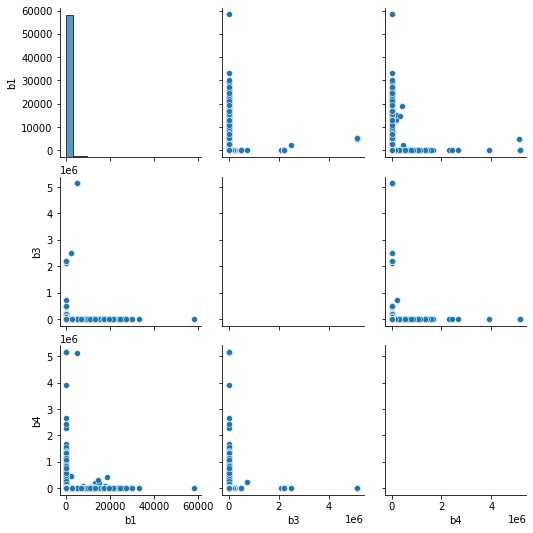

In [54]:
sns.pairplot(df[["b1", "b3", "b4"]], hue=None, hue_order=None,
             palette=None, vars=None, x_vars=None, y_vars=None, 
             kind="scatter", diag_kind="auto", markers=None)
plt.show()

# Preprecessing

## Normalizing numeric features



> Numerical Feature that are binary: b2, c3, c9, c15, c18, c19, c20, c26, c29.





In [6]:
numerical_df = df.drop(["idnr", "b2", "c3", "c9", "c15", "c18", "c19", "c20", 
                        "c26", "c29"], axis=1)
numerical_df_n = pd.DataFrame(preprocessing.normalize(numerical_df))
numerical_df_n.columns = numerical_df.columns
numerical_df_n.head()

b1        b3        b4   c1   c2   c4   c5   c6        c7   c8  c10  c11  \
0  0.0  0.111717  0.985012  0.0  0.0  0.0  0.0  0.0  0.000365  0.0  0.0  0.0   
1  0.0  0.447397  0.617834  0.0  0.0  0.0  0.0  0.0  0.004261  0.0  0.0  0.0   
2  0.0  0.021192  0.999022  0.0  0.0  0.0  0.0  0.0  0.000108  0.0  0.0  0.0   
3  0.0  0.152432  0.975689  0.0  0.0  0.0  0.0  0.0  0.000617  0.0  0.0  0.0   
4  0.0  0.198461  0.953975  0.0  0.0  0.0  0.0  0.0  0.000852  0.0  0.0  0.0   

   c12       c13  c14       c16       c17       c21  c22       c23       c24  \
0  0.0  0.092733  0.0  0.000365  0.001460  0.000004  0.0  0.000000  0.001460   
1  0.0  0.421832  0.0  0.000000  0.004261  0.000085  0.0  0.000000  0.004261   
2  0.0  0.027431  0.0  0.000000  0.000215  0.000000  0.0  0.000024  0.000968   
3  0.0  0.157369  0.0  0.000000  0.003086  0.000000  0.0  0.000000  0.003086   
4  0.0  0.217200  0.0  0.000000  0.002555  0.000000  0.0  0.000000  0.002555   

   c25  c27       c28       c30  c31       c32  c33  c34  c35  c36       c37  
0  0.0  0.0  0.000365  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.093098  
1  0.0  0.0  0.003664  0.000000  0.0  0.000043  0.0  0.0  0.0  0.0  0.490007  
2  0.0  0.0  0.000108  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.027431  
3  0.0  0.0  0.000617  0.000019  0.0  0.000123  0.0  0.0  0.0  0.0  0.003086  
4  0.0  0.0  0.000852  0.000034  0.0  0.000009  0.0  0.0  0.0  0.0  0.057920

## Transforming categorical features




In [7]:
df.head()

idnr  b1            b2   b3    b4  c1  c2            c3   c4   c5  c6   c7  \
0     1   0  b982aebe4b85  306  2698   0   0  7e8b1406d903  0.0  0.0   0  1.0   
1     2   0  615d2eb5810a  105   145   0   0  7e8b1406d903  0.0  0.0   0  1.0   
2     3   0  b982aebe4b85  197  9287   0   0  7e8b1406d903  0.0  0.0   0  1.0   
3     4   0  b982aebe4b85  247  1581   0   0  7e8b1406d903  0.0  0.0   0  1.0   
4     5   0  b982aebe4b85  233  1120   0   0  7e8b1406d903  0.0  0.0   0  1.0   

    c8            c9  c10  c11  c12  c13  c14           c15  c16  c17  \
0  0.0  7e8b1406d903  0.0  0.0  0.0  254    0  2f169f9b4e6a    1    4   
1  0.0  7e8b1406d903  0.0  0.0  0.0   99    0  7e8b1406d903    0    1   
2  0.0  7e8b1406d903  0.0  0.0  0.0  255    0  2f169f9b4e6a    0    2   
3  0.0  7e8b1406d903  0.0  0.0  0.0  255    0  2f169f9b4e6a    0    5   
4  0.0  7e8b1406d903  0.0  0.0  0.0  255    0  2f169f9b4e6a    0    3   

            c18           c19           c20   c21  c22   c23  c24  c25  \
0  651938cac602  7e8b1406d903  7e8b1406d903  0.01    0  0.00    4    0   
1  651938cac602  7e8b1406d903  7e8b1406d903  0.02    0  0.00    1    0   
2  651938cac602  7e8b1406d903  7e8b1406d903  0.00    0  0.22    9    0   
3  651938cac602  7e8b1406d903  7e8b1406d903  0.00    0  0.00    5    0   
4  651938cac602  7e8b1406d903  7e8b1406d903  0.00    0  0.00    3    0   

            c26  c27   c28           c29   c30  c31   c32  c33  c34  c35  c36  \
0  af4b5bc5ca2f    0  1.00  7e8b1406d903  0.00    0  0.00  0.0  0.0  0.0    0   
1  af2f2ec57ada    0  0.86  7e8b1406d903  0.00    0  0.01  0.0  0.0  0.0    0   
2  af4b5bc5ca2f    0  1.00  7e8b1406d903  0.00    0  0.00  0.0  0.0  0.0    0   
3  af4b5bc5ca2f    0  1.00  7e8b1406d903  0.03    0  0.20  0.0  0.0  0.0    0   
4  af4b5bc5ca2f    0  1.00  7e8b1406d903  0.04    0  0.01  0.0  0.0  0.0    0   

   c37  
0  255  
1  115  
2  255  
3    5  
4   68

In [8]:
df[["b2","c3","c9","c15","c18","c19","c20","c26","c29"]] = df[["b2","c3","c9","c15",
                                                               "c18","c19","c20","c26",
                                                               "c29"]].apply(lambda z: z.astype('category').cat.codes)
df.head()

idnr  b1  b2   b3    b4  c1  c2  c3   c4   c5  c6   c7   c8  c9  c10  c11  \
0     1   0  17  306  2698   0   0   1  0.0  0.0   0  1.0  0.0   1  0.0  0.0   
1     2   0   9  105   145   0   0   1  0.0  0.0   0  1.0  0.0   1  0.0  0.0   
2     3   0  17  197  9287   0   0   1  0.0  0.0   0  1.0  0.0   1  0.0  0.0   
3     4   0  17  247  1581   0   0   1  0.0  0.0   0  1.0  0.0   1  0.0  0.0   
4     5   0  17  233  1120   0   0   1  0.0  0.0   0  1.0  0.0   1  0.0  0.0   

   c12  c13  c14  c15  c16  c17  c18  c19  c20   c21  c22   c23  c24  c25  \
0  0.0  254    0    0    1    4    4    0    1  0.01    0  0.00    4    0   
1  0.0   99    0    1    0    1    4    0    1  0.02    0  0.00    1    0   
2  0.0  255    0    0    0    2    4    0    1  0.00    0  0.22    9    0   
3  0.0  255    0    0    0    5    4    0    1  0.00    0  0.00    5    0   
4  0.0  255    0    0    0    3    4    0    1  0.00    0  0.00    3    0   

   c26  c27   c28  c29   c30  c31   c32  c33  c34  c35  c36  c37  
0    2    0  1.00    1  0.00    0  0.00  0.0  0.0  0.0    0  255  
1    1    0  0.86    1  0.00    0  0.01  0.0  0.0  0.0    0  115  
2    2    0  1.00    1  0.00    0  0.00  0.0  0.0  0.0    0  255  
3    2    0  1.00    1  0.03    0  0.20  0.0  0.0  0.0    0    5  
4    2    0  1.00    1  0.04    0  0.01  0.0  0.0  0.0    0   68

In [9]:
processed_df = pd.concat([df[["idnr","b2","c3","c9","c15","c18","c19","c20","c26"
                    ,"c29"]], numerical_df_n], axis=1)

processed_df.head()

idnr  b2  c3  c9  c15  c18  c19  c20  c26  c29   b1        b3        b4  \
0     1  17   1   1    0    4    0    1    2    1  0.0  0.111717  0.985012   
1     2   9   1   1    1    4    0    1    1    1  0.0  0.447397  0.617834   
2     3  17   1   1    0    4    0    1    2    1  0.0  0.021192  0.999022   
3     4  17   1   1    0    4    0    1    2    1  0.0  0.152432  0.975689   
4     5  17   1   1    0    4    0    1    2    1  0.0  0.198461  0.953975   

    c1   c2   c4   c5   c6        c7   c8  c10  c11  c12       c13  c14  \
0  0.0  0.0  0.0  0.0  0.0  0.000365  0.0  0.0  0.0  0.0  0.092733  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.004261  0.0  0.0  0.0  0.0  0.421832  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.000108  0.0  0.0  0.0  0.0  0.027431  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.000617  0.0  0.0  0.0  0.0  0.157369  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.000852  0.0  0.0  0.0  0.0  0.217200  0.0   

        c16       c17       c21  c22       c23       c24  c25  c27       c28  \
0  0.000365  0.001460  0.000004  0.0  0.000000  0.001460  0.0  0.0  0.000365   
1  0.000000  0.004261  0.000085  0.0  0.000000  0.004261  0.0  0.0  0.003664   
2  0.000000  0.000215  0.000000  0.0  0.000024  0.000968  0.0  0.0  0.000108   
3  0.000000  0.003086  0.000000  0.0  0.000000  0.003086  0.0  0.0  0.000617   
4  0.000000  0.002555  0.000000  0.0  0.000000  0.002555  0.0  0.0  0.000852   

        c30  c31       c32  c33  c34  c35  c36       c37  
0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.093098  
1  0.000000  0.0  0.000043  0.0  0.0  0.0  0.0  0.490007  
2  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.027431  
3  0.000019  0.0  0.000123  0.0  0.0  0.0  0.0  0.003086  
4  0.000034  0.0  0.000009  0.0  0.0  0.0  0.0  0.057920

## Apply PCA in contextual features

In [12]:
contextual_features = processed_df.drop(["idnr", "b1", "b2", "b3", "b4"], 1)

pca = PCA(n_components=10) # divide to 10 PCs
principal_components = pca.fit_transform(contextual_features)
principal_df = pd.DataFrame(data=principal_components, columns=["PC_1", "PC_2", "PC_3",
                                                                "PC_4", "PC_5", "PC_6",
                                                                "PC_7", "PC_8", "PC_9",
                                                                "PC_10",])
principal_df.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -0.335505 -0.283181 -0.059268  0.035269 -0.018529 -0.013064 -0.004328   
1  0.298027  1.077649 -0.048181 -0.050618  0.043428  0.002958 -0.036692   
2 -0.357351 -0.307636 -0.145480  0.027962 -0.017973 -0.014504 -0.000582   
3 -0.324380 -0.306372 -0.066071 -0.071212 -0.004053 -0.007897 -0.004680   
4 -0.304737 -0.285632  0.009656 -0.068382 -0.004095 -0.006450 -0.009808   

       PC_8      PC_9     PC_10  
0 -0.000947 -0.000474  0.000057  
1  0.000042  0.003584 -0.000765  
2 -0.001115 -0.000948  0.000679  
3 -0.000867  0.001184 -0.000303  
4 -0.000716  0.001370 -0.000154

**Analyze Elbow Rule**

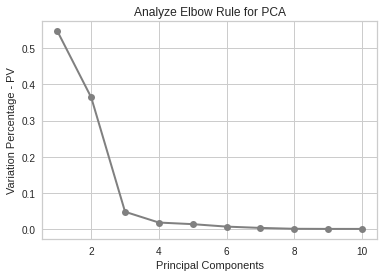

In [13]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, "bo-", linewidth=2, color="grey")
plt.title("Analyze Elbow Rule for PCA")
plt.xlabel("Principal Components")
plt.ylabel("Variation Percentage - PV")
plt.show()

In [14]:
sum = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, columns=["Cumulative_PV"])
print("Cumulative Variation Percentage (PV) Explained:")
print(sum)

Cumulative Variation Percentage (PV) Explained:
   Cumulative_PV
0      54.691843
1      91.066548
2      95.823379
3      97.602504
4      98.938767
5      99.594573
6      99.893337
7      99.946580
8      99.967522
9      99.986278


In [15]:
contextual_pc = principal_df[["PC_1", "PC_2", "PC_3", "PC_4"]]

## Update data with Contextual PCs

In [16]:
dim_reduced_df = pd.concat([processed_df[["idnr", "b1", "b2", "b3", "b4"]], contextual_pc], axis=1)
dim_reduced_df.head()

idnr   b1  b2        b3        b4      PC_1      PC_2      PC_3      PC_4
0     1  0.0  17  0.111717  0.985012 -0.335505 -0.283181 -0.059268  0.035269
1     2  0.0   9  0.447397  0.617834  0.298027  1.077649 -0.048181 -0.050618
2     3  0.0  17  0.021192  0.999022 -0.357351 -0.307636 -0.145480  0.027962
3     4  0.0  17  0.152432  0.975689 -0.324380 -0.306372 -0.066071 -0.071212
4     5  0.0  17  0.198461  0.953975 -0.304737 -0.285632  0.009656 -0.068382

In [17]:
features = dim_reduced_df.drop("idnr", 1)
features.head()

b1  b2        b3        b4      PC_1      PC_2      PC_3      PC_4
0  0.0  17  0.111717  0.985012 -0.335505 -0.283181 -0.059268  0.035269
1  0.0   9  0.447397  0.617834  0.298027  1.077649 -0.048181 -0.050618
2  0.0  17  0.021192  0.999022 -0.357351 -0.307636 -0.145480  0.027962
3  0.0  17  0.152432  0.975689 -0.324380 -0.306372 -0.066071 -0.071212
4  0.0  17  0.198461  0.953975 -0.304737 -0.285632  0.009656 -0.068382

## Scatter Plot tranformed data

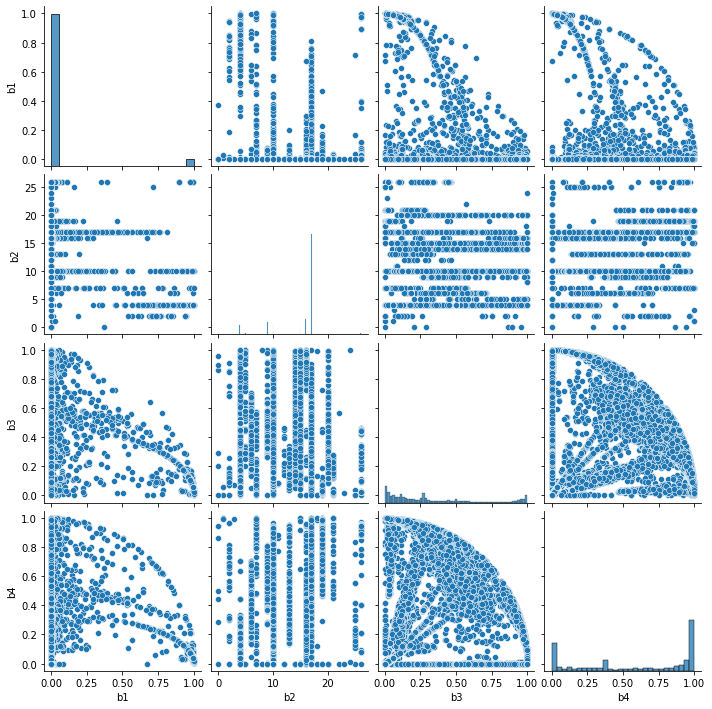

In [69]:
sns.pairplot(processed_df[["b1", "b2", "b3", "b4"]], hue=None, hue_order=None,
             palette=None, vars=None, x_vars=None, y_vars=None, kind="scatter",
             diag_kind="auto", markers=None)

## Kurtosis features behavioural

Kurtosis - (degree to which data values are concentrated around the mean)
Kurtosis: [16.7244556   1.67609696  0.07454901 -1.51975071]


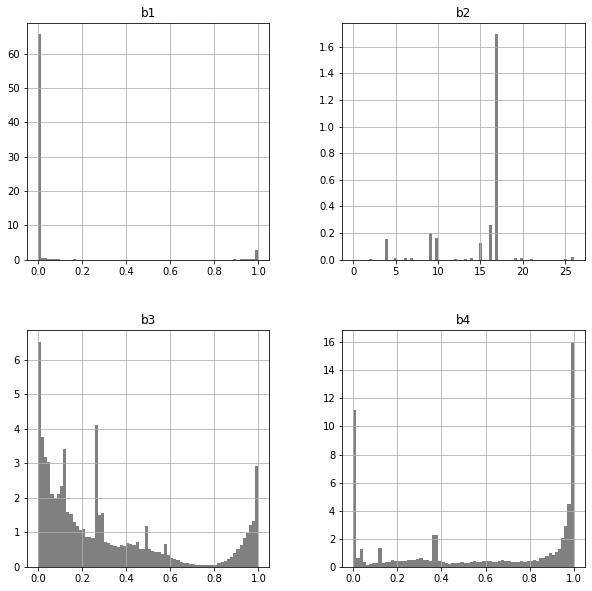

In [72]:
kur_degree = kurtosis(processed_df[["b1", "b2", "b3", "b4"]])
print("Kurtosis - (degree to which data values are concentrated around the mean)")
print(f"Kurtosis: {kur_degree}")
processed_df[["b1", "b2", "b3", "b4"]].hist(figsize=(10, 10), bins=70, color="grey",
                                            density=True)
plt.show()

# Training Pipeline

In [18]:
n_estimators = 50 # N of Isolation trees trained
max_samples = 500 # N of data points used to train each tree
contamination = 0.01 # Fraction of anomalous data points
n_jobs=4 # run in parallel
random_state=42 #

In [20]:
models()

INFO:logs:gpu_param set to False


Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

**Build Model**

In [22]:
isolation_forest_model = IsolationForest(n_estimators, max_samples, contamination,
                                         n_jobs=n_jobs, random_state=random_state)

**Fitting the model**

In [23]:
isolation_forest_model.fit(features)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples=500, n_estimators=50, n_jobs=4,
                random_state=42, verbose=0, warm_start=False)

**Get anomaly scores and predictions**

In [24]:
anomaly_score = isolation_forest_model.decision_function(features)
predictions = isolation_forest_model.predict(features)

**Dummy outlier features**

In [26]:
dim_reduced_df["anomaly_score"] = anomaly_score
dim_reduced_df["anomaly_labels"] = predictions
dim_reduced_df["is_outlier"] = dim_reduced_df["anomaly_labels"].apply(lambda z: 1 if z == -1 else 0)
dim_reduced_df.head()

idnr   b1  b2        b3        b4      PC_1      PC_2      PC_3      PC_4  \
0     1  0.0  17  0.111717  0.985012 -0.335505 -0.283181 -0.059268  0.035269   
1     2  0.0   9  0.447397  0.617834  0.298027  1.077649 -0.048181 -0.050618   
2     3  0.0  17  0.021192  0.999022 -0.357351 -0.307636 -0.145480  0.027962   
3     4  0.0  17  0.152432  0.975689 -0.324380 -0.306372 -0.066071 -0.071212   
4     5  0.0  17  0.198461  0.953975 -0.304737 -0.285632  0.009656 -0.068382   

   anomaly_score  anomaly_labels  is_outlier  
0       0.255953               1           0  
1       0.086589               1           0  
2       0.248186               1           0  
3       0.242095               1           0  
4       0.241281               1           0

In [27]:
dim_reduced_df[dim_reduced_df["is_outlier"] == 1].head()

idnr        b1  b2        b3        b4      PC_1      PC_2      PC_3  \
112   113  0.000000  20  0.112121  0.000000  0.509578  1.857019  0.066810   
194   195  0.221264   7  0.049440  0.973957 -0.366679 -0.317670 -0.182021   
309   310  0.119151  19  0.021664  0.964043  0.053701  0.277723 -0.269553   
539   540  0.000000  17  0.000000  0.000000  2.855324 -0.662843  0.116186   
570   571  0.000000  17  0.000000  0.000000  2.840417 -0.651146  0.097730   

         PC_4  anomaly_score  anomaly_labels  is_outlier  
112 -0.282679      -0.020622              -1           1  
194  0.027233      -0.012874              -1           1  
309  0.220283      -0.015822              -1           1  
539  0.662583      -0.014220              -1           1  
570  0.745436      -0.015751              -1           1

# Evaluation